## Project objective: 


1.	compare different deep learning algorithms to detect and classify three classes of facemask images which are Incorrectly_worn_mask', 'Masked', 'without_mask'
2.	Evaluate the impact of data augmentation, transfer learning to enhance the model and mitigate against class imbalance. 
3.	Evaluate of accuracy, precision, recall, F1-score in categorizing facemask images These deep learning models include CNN (baseline model),data augmentation implementation and transfer learning DenseNet-201. 
4.	Deployment of deep learning enabled web app for brain tumor detection and classification for the public.


In [1]:
import pandas as pd # for dataframe and manipulation of data
import numpy as np # For numerical computing 
from glob import glob# for path declaration 
import os #interacting with pathways and operating systems
import matplotlib.pyplot as plt # for creation of visualization like charts, piecharts
import warnings # handles warning 
warnings.filterwarnings("ignore")#supreses warning messages
import cv2 #Import openCV for image processing
from sklearn.model_selection import train_test_split #imports traintest split function to split the dataset
from sklearn.preprocessing import LabelEncoder #converts categorical variables to numerical formats
import tensorflow as tf#imported framework for deep learning training
from keras.utils import to_categorical# coverts class labels to one hot encoding
from tensorflow.keras import layers, models #provides interface for building and training a model
from tensorflow.keras.optimizers import Adam # imports optimizer for neural building and training from tensorflow 
from tensorflow.keras.layers import BatchNormalization, Dropout # to reduce overfitting and improve convergence in model.
from tensorflow.keras.regularizers import l2#imports l2 regularization to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping #to stop model from further training when it stops to improve
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#imports classification metrics
from imblearn.over_sampling import SMOTE#imported to address imbalance classification problem
from sklearn.metrics import confusion_matrix#to evaluate performance of the classification problem
from keras.models import Sequential#Allows you to build your model step by step
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout#support various in the model development
import seaborn as sns#seaborn libray for visualization plots like line graphs , charts etc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.applications import ResNet50, VGG16, VGG19, InceptionV3, MobileNetV2#imports pre-trained deep models
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D#for customizing the neural network
from tensorflow.keras.models import Model#Allowsyou to create model using functional API
from tensorflow.keras.utils import to_categorical#convert class labels to one hot encoding

In [2]:
imgFolder = r"C:\Users\USER\Desktop\MLOPS\data"#path to dataset 

In [3]:
# obtain the list of image folders

os.listdir(imgFolder)

['Incorrectly_worn_mask', 'Masked', 'without_mask']

In [4]:
# imgList = [] #initialzing of an empty list to save our images

# for imgFolderName in os.listdir(imgFolder):#iterate over subdirectories in the image folder
#     imgFolderPath = os.path.join(imgFolder, imgFolderName)#getting the subdirectories path
#     for image_path in glob(os.path.join(imgFolderPath, "*.[jp][pn]g")):
# #     for image_path in glob(os.path.join(imgFolderPath, "*jpg")):#going through the image files(JPG) in the current subdirectory
#         imgList.append(image_path)# add the image path to the img list
imgList = []  # Initialize an empty list to save our images

for imgFolderName in os.listdir(imgFolder):  # Iterate over subdirectories in the image folder
    imgFolderPath = os.path.join(imgFolder, imgFolderName)  # Get the subdirectory's path
    # Use glob to match all desired image extensions
    for image_path in glob(os.path.join(imgFolderPath, "*.[pPjJ][nNpPjJeE][gG]")):
        imgList.append(image_path)  # Add the image path to the imgList

In [5]:
# images_df = [] #initialize an empty list to save images

# for imgFoldername in os.listdir(imgFolder):#iterate over subdirectories in the image folder
#     imgFolderPath = os.path.join(imgFolder, imgFoldername)#getting the subdirectories path
#     for imagePath in glob(os.path.join(imgFolderPath, "*.[jp][pn]g")):
# #     for imagePath in glob(os.path.join(imgFolderPath, "*jpg")):#going through the image files(JPG) in the current subdirectory
#         images_df.append([imagePath, imgFoldername])#add the image path and image folder name to the image_df
images_df = [] #initialize an empty list to save images

for imgFoldername in os.listdir(imgFolder):#iterate over subdirectories in the image folder
    imgFolderPath = os.path.join(imgFolder, imgFoldername)#getting the subdirectories path
    for imagePath in glob(os.path.join(imgFolderPath, "*.[pPjJ][nNpPjJeE][gG]")):#going through the image files(JPG) in the current subdirectory
        images_df.append([imagePath, imgFoldername])#add the image path and image folder name to the image_df

### Dataframe Creation

#### "FaceMaskDF" with two columns named "image" column being our X input and "Target" column being Y output.

In [6]:
FaceMaskDF = pd.DataFrame(images_df, columns=['image', 'target'])#create dataframe from images_df with column image and target

In [7]:
class_counts = FaceMaskDF ['target'].value_counts()#checking the class distribution
print(class_counts)#printing the output of the distribution

# Load and preprocess the image data
X = []
y = LabelEncoder().fit_transform(FaceMaskDF ['target'])  # Convert target labels to numeric

for image_path in FaceMaskDF ['image']:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))  # Resize the image to the desired dimensions
    X.append(image)

X = np.array(X) #storing the images

without_mask             3828
Masked                   3725
Incorrectly_worn_mask    3003
Name: target, dtype: int64


In [8]:
len(FaceMaskDF) 

10556

### SMOTE IMPLMENTATION 

#### From the cell above , we can see we have an inbalance class , SMOTE was implemented to balance the classes.

In [9]:
smote = SMOTE(sampling_strategy='minority', random_state=100)#Implement SMOTE 
X_sm, y_sm = smote.fit_resample(X.reshape(-1, 64*64*3), y)
y_sm_counts = pd.Series(y_sm).value_counts()#checking the class distribution after SMOTE
print(y_sm_counts)

0    3828
2    3828
1    3725
dtype: int64


In [10]:
FaceMaskDF.isna().sum()

image     0
target    0
dtype: int64

### SPLITTING OF OUR DATASET
####  We are using the train_test_split() function from scikit-learn to split the dataset into three parts,60% train,20%test and 20%validation.

In [11]:
# Splitting the data into train, test, and validation sets 
test_size = 0.2
validation_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=test_size, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=100)

In [12]:
from keras.utils import to_categorical

# Encode our labels into a numerical numbers for multiclassification
encoder = LabelEncoder()
encoder.fit(y_train)
train_y = to_categorical(encoder.transform(y_train))
test_y = to_categorical(encoder.transform(y_test))
val_y = to_categorical(encoder.transform(y_val))

In [13]:
y_train

array([0, 0, 1, ..., 1, 2, 2])

In [14]:
train_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### OVERVIEW OF THE DATASET
#### Let's print the shape of the images and labels

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7283, 12288)
(2277, 12288)
(1821, 12288)


In [16]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(7283,)
(2277,)
(1821,)


In [17]:
 IMAGE_SIZE = 64

### DATA NORMALIZATION AND RESCALING
#### The **image pixel values range from 0-255**, our method of normalization will be **scaling** - we will **divide all the pixel values by 255 to standardize the images to have values between 0-1 and converted the image dimension to 128,128,3.**

In [18]:
def create_dataset(df, image_size):#takes in two parameters
    tmp = np.zeros((len(df), image_size, image_size, 3), dtype="float32")

    for n in range(0, len(df)):#going through each row in a dataframe
        im = df[n].reshape(image_size, image_size, 3)  # Reshaping the image data to 224,224,3
        tmp[n] = im / 255.0  # Normalize the image by dividing by 255

    print(tmp.shape, tmp.size)#print shape of the array
    return tmp#returns a normalized and reshaped array

In [19]:
x_train = create_dataset(X_train, IMAGE_SIZE)

(7283, 64, 64, 3) 89493504


In [20]:
x_test = create_dataset(X_test, IMAGE_SIZE)

(2277, 64, 64, 3) 27979776


In [21]:
x_val = create_dataset(X_val, IMAGE_SIZE)

(1821, 64, 64, 3) 22376448


In [22]:
x_train

array([[[[0.14901961, 0.14117648, 0.13725491],
         [0.1254902 , 0.11764706, 0.11372549],
         [0.09803922, 0.08627451, 0.08235294],
         ...,
         [0.08627451, 0.09411765, 0.10980392],
         [0.09019608, 0.09803922, 0.11764706],
         [0.09411765, 0.10588235, 0.1254902 ]],

        [[0.14901961, 0.14117648, 0.13725491],
         [0.1254902 , 0.11764706, 0.11372549],
         [0.09803922, 0.08627451, 0.08235294],
         ...,
         [0.09019608, 0.10196079, 0.11764706],
         [0.09411765, 0.10588235, 0.12941177],
         [0.10196079, 0.11372549, 0.13725491]],

        [[0.14901961, 0.14117648, 0.13725491],
         [0.1254902 , 0.11764706, 0.11372549],
         [0.09803922, 0.08627451, 0.08235294],
         ...,
         [0.09019608, 0.10196079, 0.12156863],
         [0.09803922, 0.11372549, 0.13725491],
         [0.10588235, 0.12156863, 0.14901961]],

        ...,

        [[0.03529412, 0.02352941, 0.02352941],
         [0.03137255, 0.02352941, 0.01960784]

In [23]:
x_test

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [24]:
x_val

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

### SAMPLE VISUALIZATION OF IMAGES
#### 7samples of the face mask images were sampled displaying the 3classes

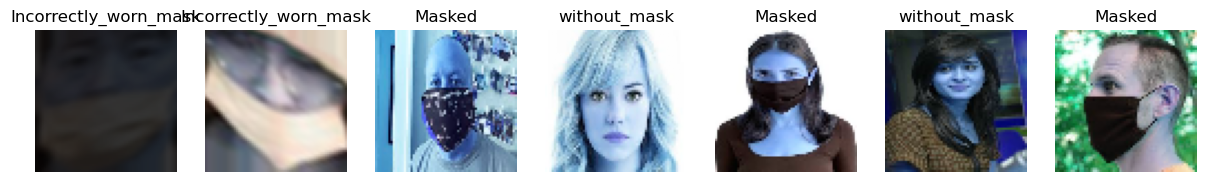

In [25]:
class_names = FaceMaskDF['target'].unique()

num_samples_to_display = 7#Defining the sample of 7 images

# Create a function to display sample images with class names
def display_sample_images(images, labels, class_names):
    fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 3))
    for i in range(num_samples_to_display):
        ax = axes[i]
        ax.imshow(images[i])
        class_name = class_names[np.argmax(labels[i])]  # Getting the class name based on the one-hot encoded label
        ax.set_title(class_name)
        ax.axis('off')
    plt.show()

# Display sample images from the training dataset
display_sample_images(x_train[:num_samples_to_display], train_y[:num_samples_to_display], class_names)


### VISUALIZATION OF THE SMOTE GENERATED IMAGES
#### 20  images generated by SMOTE were sampled to ensure that it was not noise rather the brain tumor  "no tumor images" that was needed..

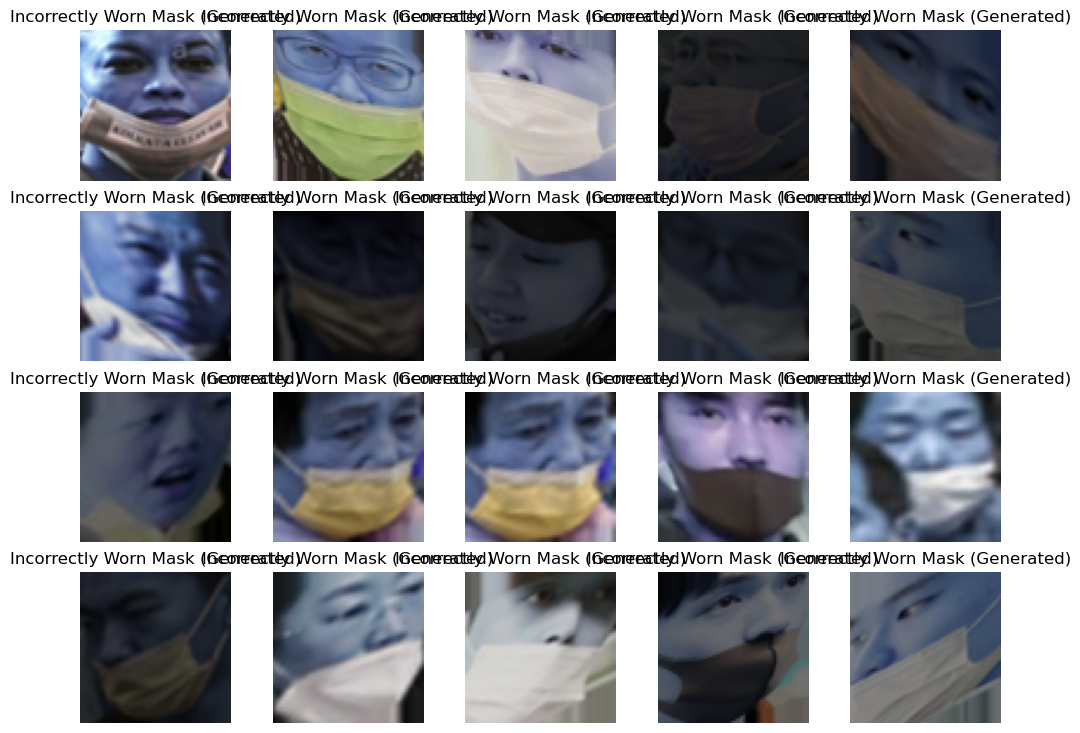

In [26]:
Incorrectly_worn_samples = X_sm[y_sm == 0][:20]  # Select the first 20 sample
plt.figure(figsize=(12, 9))# Visualize the selected samples in rows of 5 images each
for i in range(len(Incorrectly_worn_samples)):
    plt.subplot(4, 5, i + 1)  # 4 rows and 5 columns for 20 images
    plt.imshow(Incorrectly_worn_samples[i].reshape(64, 64, 3))  # Reshape and display the image
    plt.title("Incorrectly Worn Mask (Generated)")
    plt.axis("off")
plt.show()# display images


## DATA VISUALIZATION 
#### in this section , the visualization of the inbalance four classes before SMOTE was carried out and further visualization was shown after SMOTE was carried out showing balanced classes.

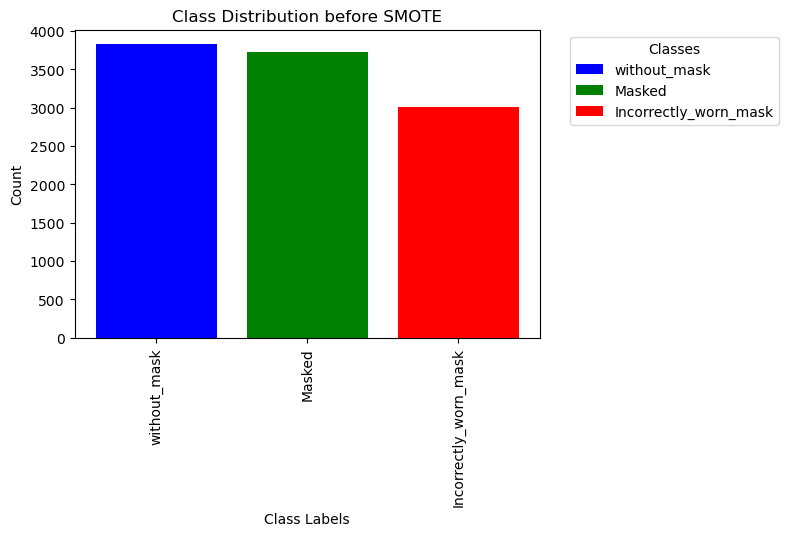

In [27]:
# Calculate class distribution for the original data
class_distribution_original = FaceMaskDF['target'].value_counts()

# Now,getting class names from the unique class labels
class_names = class_distribution_original.index

# we define colors for the four classes
colors = ['blue', 'green', 'red']

# Now , we Create a bar chart 
plt.figure(figsize=(6, 4))
bars = plt.bar(class_names, class_distribution_original, color=colors)

#  labels and title addition
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution before SMOTE')

# key addition outside 
legend = plt.legend(bars, class_names, title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate class names by 90 degrees
plt.xticks(rotation=90)

# display our chart
plt.show()

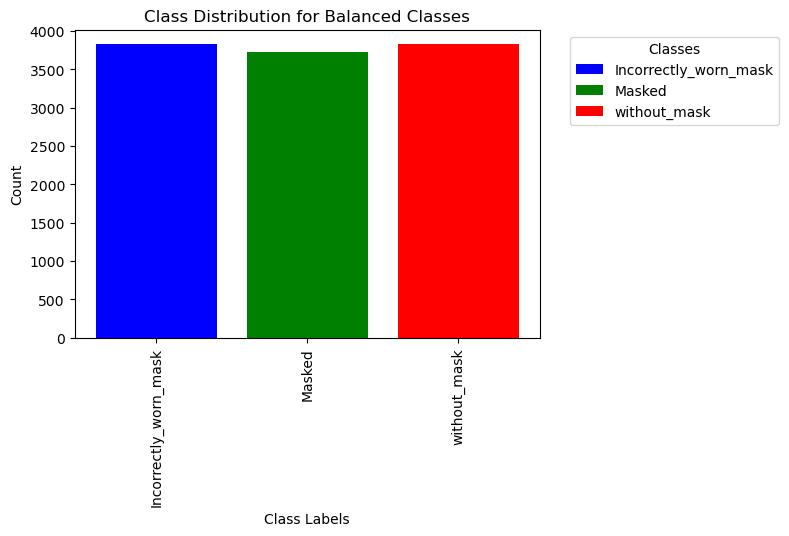

In [28]:
import matplotlib.pyplot as plt


class_distribution_X_sm = pd.Series(y_sm).value_counts().sort_index() # Calculate class distributions


class_names = FaceMaskDF['target'].unique()# Get class names from the unique class labels in your target data


colors = ['blue', 'green', 'red']# colours for the respective classes

# Create respective bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(class_names, class_distribution_X_sm.values, color=colors)

plt.xlabel('Class Labels')  # Addition of labels and title
plt.ylabel('Count')
plt.title('Class Distribution for Balanced Classes')

# Add legend (key) outside the box
legend = plt.legend(bars, class_names, title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate class names 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

### From above we can see that we now have a balanced three classes after carrying out SMOTE to balance the classes

In [29]:
train_images = x_train
train_labels = train_y
test_images = x_test
test_labels = test_y
val_images = x_val
val_labels = val_y

### CUSTOM CNN WITHOUT DATA AUGMENTATION

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.callbacks import EarlyStopping
import time


# Create the model or instantiate 
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.7))
# Flatten for fully connected layers
model.add(Flatten())

# Output layer
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
# Record the start time
start_time = time.time()

# Fit the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels), verbose=1, callbacks=[early_stopping])

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/20
228/228 [==============================] - 28s 116ms/step - loss: 0.6226 - accuracy: 0.7406 - val_loss: 0.4017 - val_accuracy: 0.8578
Epoch 2/20
228/228 [==============================] - 28s 119ms/step - loss: 0.3554 - accuracy: 0.8709 - val_loss: 0.4326 - val_accuracy: 0.8342
Epoch 3/20
228/228 [==============================] - 21s 90ms/step - loss: 0.2831 - accuracy: 0.9016 - val_loss: 0.3488 - val_accuracy: 0.8814
Epoch 4/20
228/228 [==============================] - 22s 96ms/step - loss: 0.2504 - accuracy: 0.9136 - val_loss: 0.2914 - val_accuracy: 0.8995
Epoch 5/20
228/228 [==============================] - 21s 91ms/step - loss: 0.2136 - accuracy: 0.9253 - val_loss: 0.3582 - val_accuracy: 0.8726
Epoch 6/20
228/228 [==============================] - 20s 88ms/step - loss: 0.1992 - accuracy: 0.9289 - val_loss: 0.2940 - val_accuracy: 0.9044
Epoch 7/20
228/228 [==============================] - 22s 95ms/step - loss: 0.1842 - accuracy: 0.9366 - val_loss: 0.2803 - val_accurac

In [32]:
model.save("CnnFaceMask3model.h5")

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

72/72 [==============================] - 2s 22ms/step - loss: 0.2380 - accuracy: 0.9245


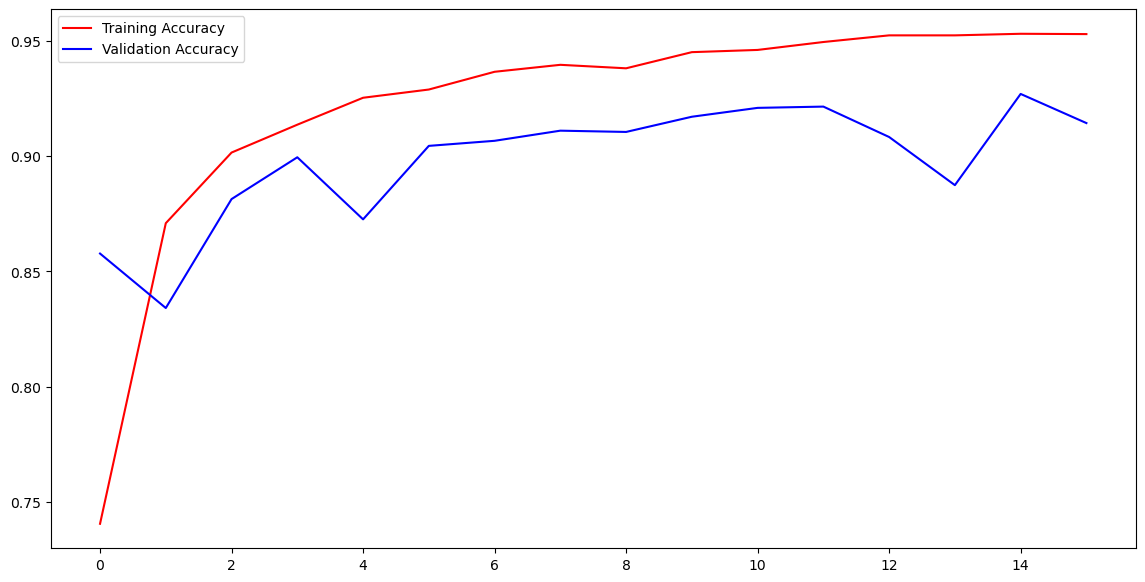

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

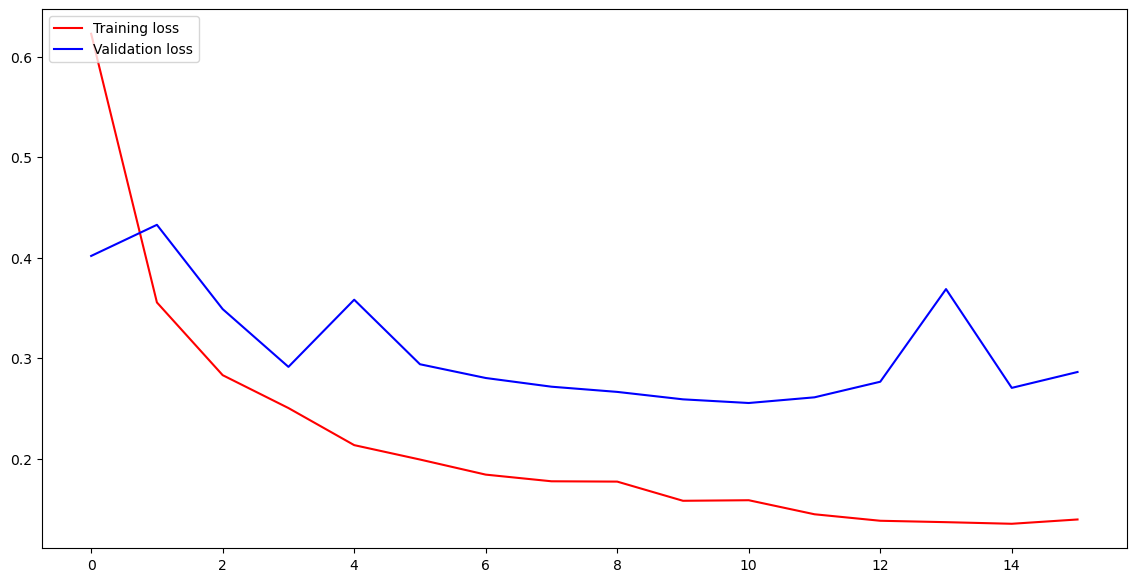

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [36]:
y_pred = model.predict(test_images)

72/72 [==============================] - 2s 20ms/step


### VISUALIZING OUR CNN WITHOUT DATA AUGMENTATION 

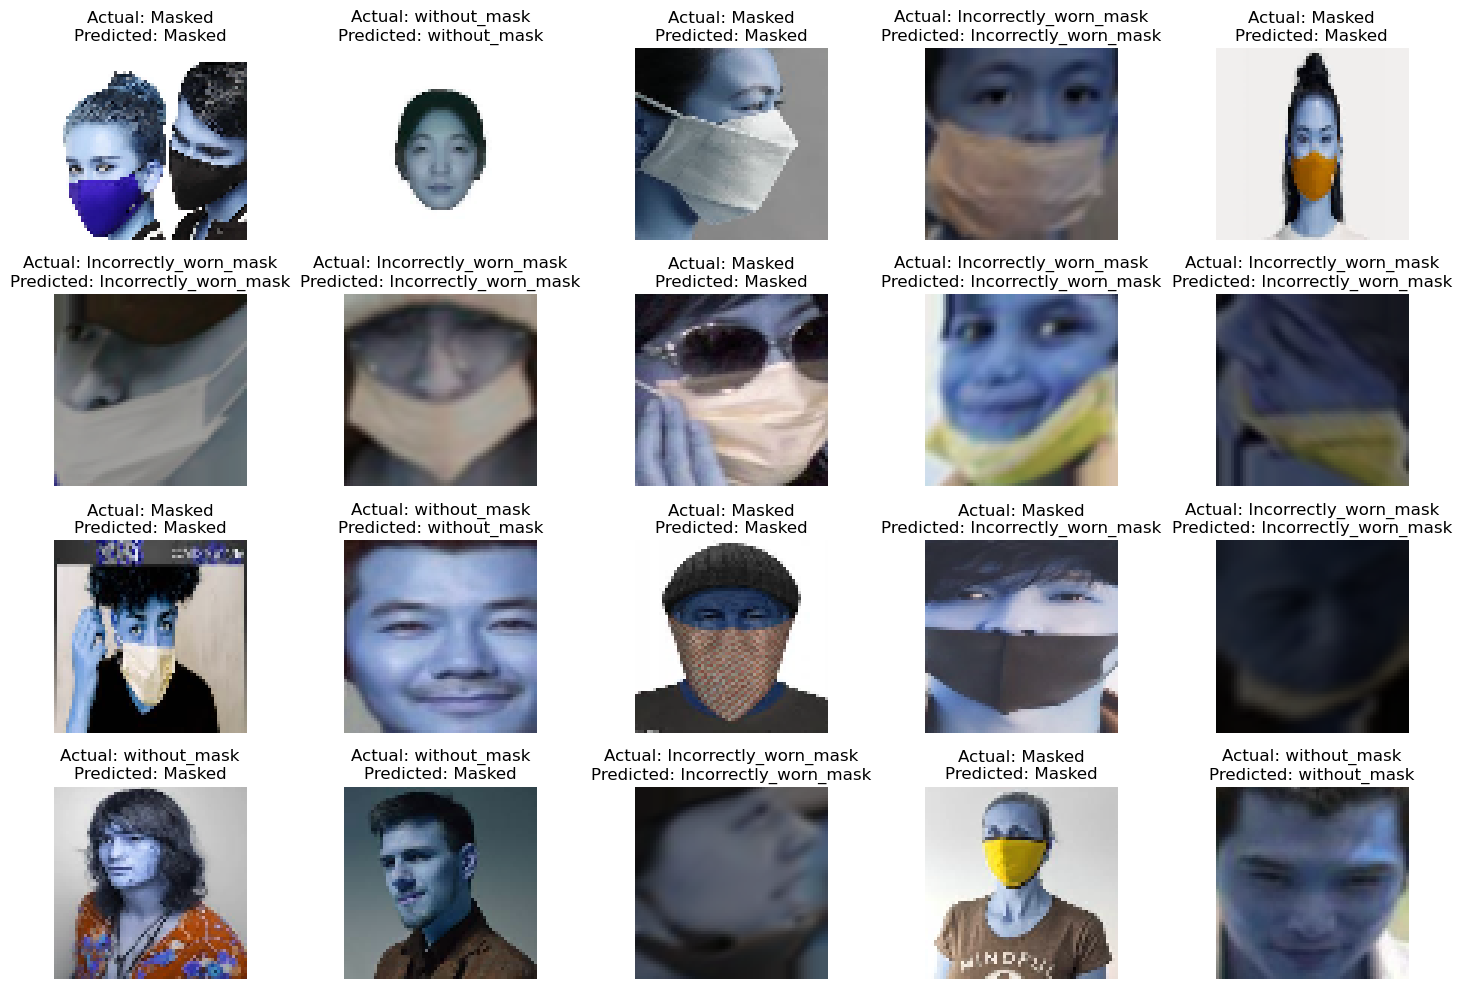

In [37]:
# Defining the respective class names
class_names = FaceMaskDF['target'].unique()

# Set the number of samples to display
samples_num = 20

# Generate random indices for displaying 20 images
random_idx = np.random.choice(len(test_images), samples_num, replace=False)

# Create a figure with four rows
fig, axes = plt.subplots(4, samples_num // 4, figsize=(15, 10))

# Flattening for easier indexing
axes = axes.ravel()

for i, idx in enumerate(random_idx):
    # Display the actual image
    axes[i].imshow(test_images[idx])

    # Getting the actual and predicted class labels
    actual_class = class_names[np.argmax(test_labels[idx])]
    predicted_class = class_names[np.argmax(y_pred[idx])]

    # Formatting  the title using triple quotes
    title = f"Actual: {actual_class}\nPredicted: {predicted_class}"

    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### CONFUSION METRICS OF CNN WITHOUT DATA AUGMENTATION

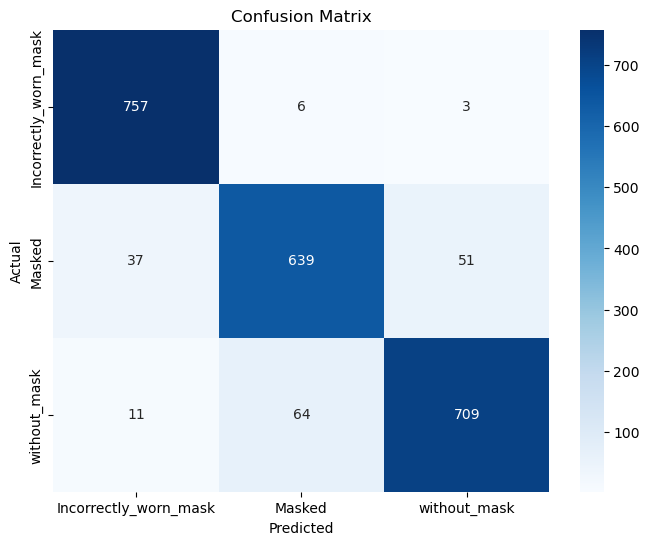

In [38]:
# Confusion Matrix
confusion = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))

# Plotting of the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [39]:
training_accuracy = history.history['accuracy']  
validation_accuracy = history.history['val_accuracy']  # Getting the training and validation accuracy

# Print the last epoch's accuracies 
print(f'Training Accuracy: {training_accuracy[-1]:.4f}')
print(f'Validation Accuracy: {validation_accuracy[-1]:.4f}')

Training Accuracy: 0.9529
Validation Accuracy: 0.9143


In [40]:
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))
precision = precision_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')

In [41]:
# Display the evaluation metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.9245
Precision: 0.9241
Recall: 0.9245
F1 Score: 0.9240


In [42]:
from sklearn.metrics import classification_report

# Calculate classification report
classification_rep = classification_report(
    np.argmax(test_labels, axis=1),
    np.argmax(y_pred, axis=1),
    target_names=class_names,
    digits=4  # You can adjust the number of decimal places
)

# Display the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
                       precision    recall  f1-score   support

Incorrectly_worn_mask     0.9404    0.9883    0.9637       766
               Masked     0.9013    0.8790    0.8900       727
         without_mask     0.9292    0.9043    0.9166       784

             accuracy                         0.9245      2277
            macro avg     0.9236    0.9238    0.9234      2277
         weighted avg     0.9241    0.9245    0.9240      2277



### CNN WITH DATA AUGMENTATION
###Real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, 
one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. Taking this attribute into account, we can augment the images using the techniques listed below -
**1. Horizontal Flip** (should be set to True/False)
**2. Vertical Flip** (should be set to True/False) 
**3. Height Shift** (should be between 0 and 1) 
**4. Width Shift** (should be between 0 and 1) 
**5. Rotation** (should be between 0 and 180) 
**6. Shear** (should be between 0 and 1) 
**7. Zoom** (should be between 0 and 1) etc. 


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly apply shear transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # How to fill newly created pixels
)


In [44]:
# Create the CnnAugModel with data augmentation layers
CnnAugmodel = models.Sequential()

CnnAugmodel.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3), kernel_regularizer=l2(0.001)))
CnnAugmodel.add(layers.BatchNormalization())
CnnAugmodel.add(layers.MaxPooling2D((2, 2)))
CnnAugmodel.add(Dropout(0.3))  # Dropout layer
CnnAugmodel.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
CnnAugmodel.add(layers.BatchNormalization())
CnnAugmodel.add(layers.MaxPooling2D((2, 2)))
CnnAugmodel.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
CnnAugmodel.add(layers.BatchNormalization())
CnnAugmodel.add(layers.MaxPooling2D((2, 2)))
CnnAugmodel.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(0.00)))
CnnAugmodel.add(layers.BatchNormalization())
CnnAugmodel.add(layers.MaxPooling2D((2, 2)))


CnnAugmodel.add(layers.Flatten())
CnnAugmodel.add(layers.Dense(64, activation='relu'))
CnnAugmodel.add(Dropout(0.3))  # Dropout layer
CnnAugmodel.add(layers.Dense(3, activation='softmax'))

In [45]:
from keras import optimizers
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
batch_size = 64
CnnAugmodel.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

# Training the CnnAugModel with data augmentation
augmented_train_generator = datagen.flow(train_images, train_labels, batch_size=batch_size)


In [46]:
# Record the start time
start_time = time.time()

# Fit the model
history_with_Dataugmentation = CnnAugmodel.fit(augmented_train_generator, epochs=20,
                                           validation_data=(val_images, val_labels),
                                           callbacks=[early_stopping], verbose=1)


# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/20
114/114 [==============================] - 78s 665ms/step - loss: 1.0727 - accuracy: 0.6657 - val_loss: 1.5792 - val_accuracy: 0.3322
Epoch 2/20
114/114 [==============================] - 88s 775ms/step - loss: 0.7385 - accuracy: 0.7464 - val_loss: 2.9079 - val_accuracy: 0.3311
Epoch 3/20
114/114 [==============================] - 75s 657ms/step - loss: 0.6545 - accuracy: 0.7833 - val_loss: 2.8360 - val_accuracy: 0.3322
Epoch 4/20
114/114 [==============================] - 72s 630ms/step - loss: 0.6031 - accuracy: 0.8056 - val_loss: 1.8472 - val_accuracy: 0.4146
Epoch 5/20
114/114 [==============================] - 91s 782ms/step - loss: 0.5569 - accuracy: 0.8242 - val_loss: 1.1716 - val_accuracy: 0.6079
Epoch 6/20
114/114 [==============================] - 74s 649ms/step - loss: 0.5331 - accuracy: 0.8322 - val_loss: 0.7942 - val_accuracy: 0.7304
Epoch 7/20
114/114 [==============================] - 81s 713ms/step - loss: 0.5172 - accuracy: 0.8388 - val_loss: 0.7290 - val_ac

In [47]:
CnnAugmodel.save("DaAugmCnnFaceMask3model.h5")

In [48]:
test_loss, test_acc = CnnAugmodel.evaluate(test_images, test_labels, verbose=1)

72/72 [==============================] - 9s 130ms/step - loss: 0.3091 - accuracy: 0.9201


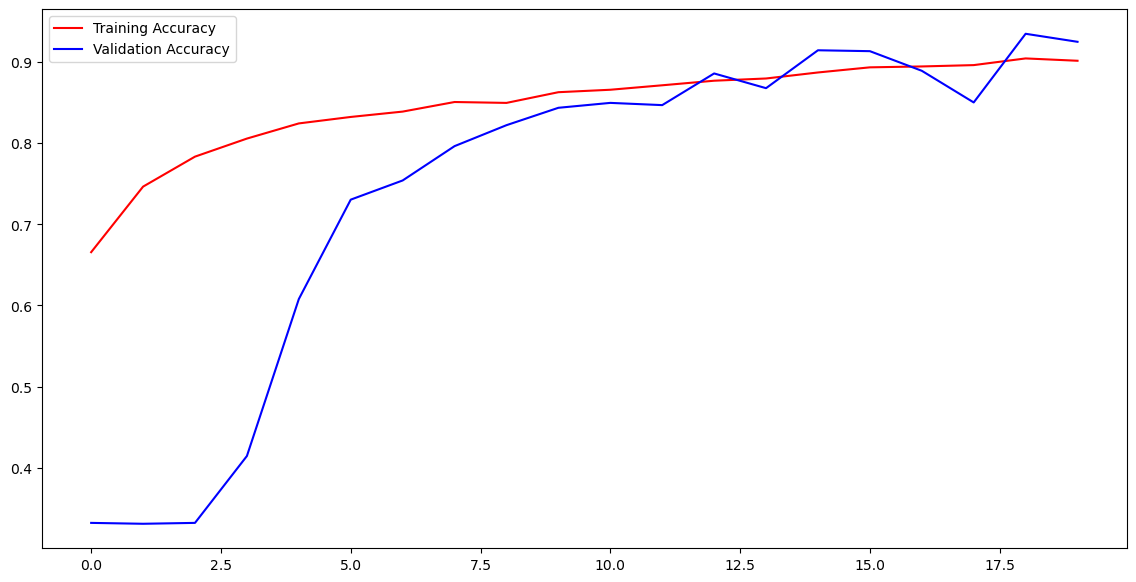

In [49]:
acc = history_with_Dataugmentation.history['accuracy']
val_acc = history_with_Dataugmentation.history['val_accuracy']

epochs = range(len(acc))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

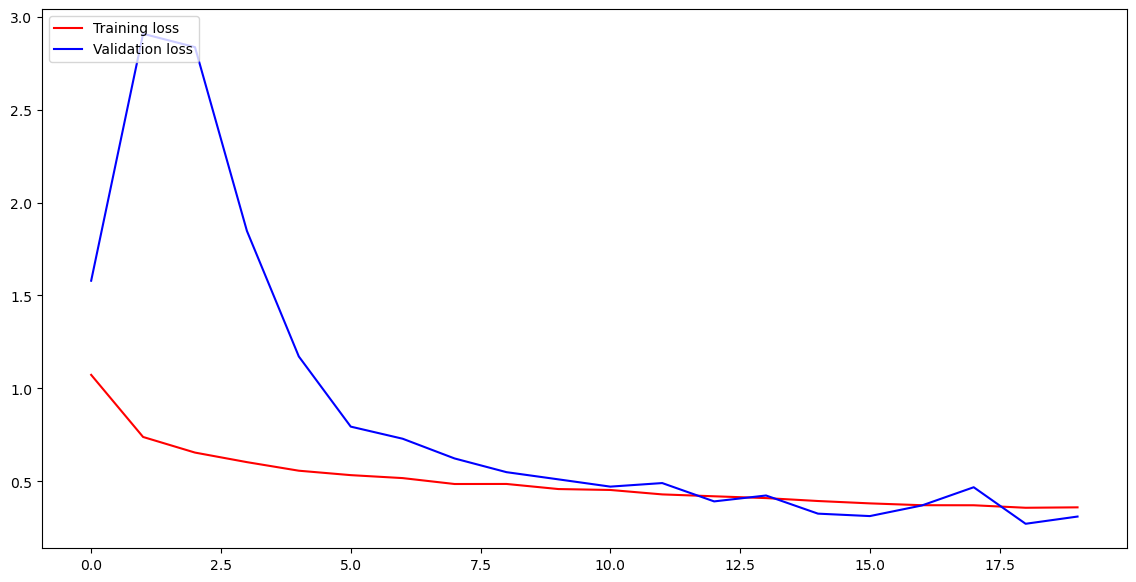

In [50]:
loss =  history_with_Dataugmentation.history['loss']
val_loss =  history_with_Dataugmentation.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [51]:
training_accuracy = history_with_Dataugmentation.history['accuracy']  
validation_accuracy = history_with_Dataugmentation.history['val_accuracy']  

# Print the last epoch's accuracies (you can iterate over all epochs if needed)
print(f'Training Accuracy: {training_accuracy[-1]:.4f}')
print(f'Validation Accuracy: {validation_accuracy[-1]:.4f}')

Training Accuracy: 0.9014
Validation Accuracy: 0.9248


In [52]:
y_pred = CnnAugmodel.predict(test_images)

72/72 [==============================] - 7s 91ms/step


### VISUALIZING OUR PREDICTION FOR CNN WITH DATA AUGMENTATION

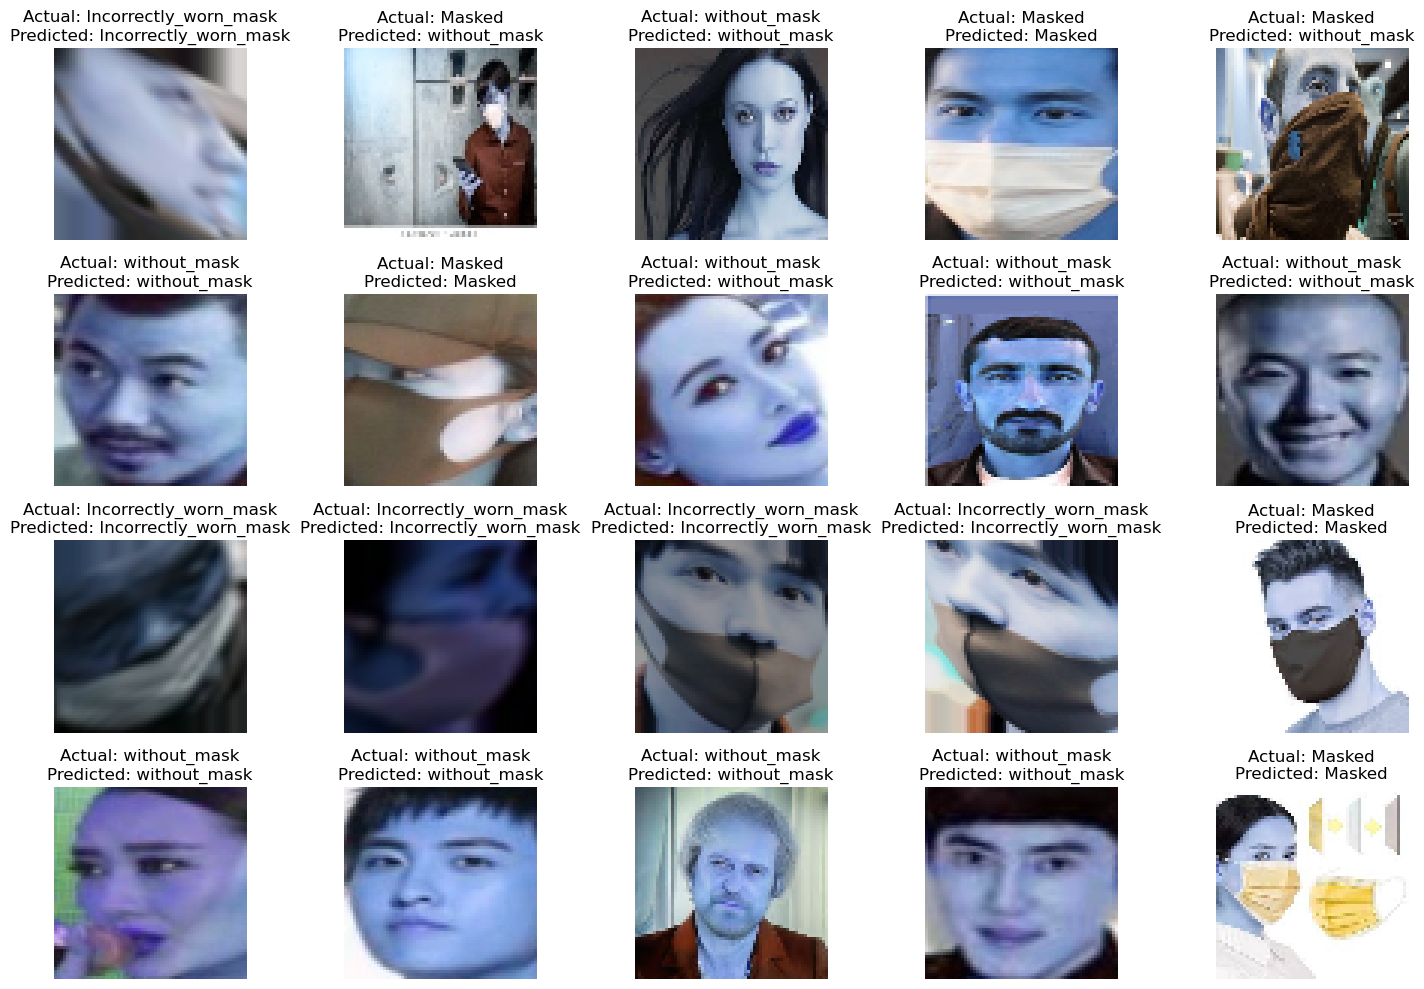

In [53]:
# Define class names
# class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
class_names =  FaceMaskDF['target'].unique()

# Set the number of samples to display
samples_num = 20

# Generate random indices for displaying 20 images
random_idx = np.random.choice(len(test_images), samples_num, replace=False)

# Create a figure with four rows
fig, axes = plt.subplots(4, samples_num // 4, figsize=(15, 10))

# Flattening for easier indexing
axes = axes.ravel()

for i, idx in enumerate(random_idx):
    # Display the actual image
    axes[i].imshow(test_images[idx])

    # Get the actual and predicted class labels
    actual_class = class_names[np.argmax(test_labels[idx])]
    predicted_class = class_names[np.argmax(y_pred[idx])]

    # Format the title using triple quotes
    title = f"Actual: {actual_class}\nPredicted: {predicted_class}"

    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### CONFUSION MATRIX FOR CNN WITH DATA AUGMENTATION

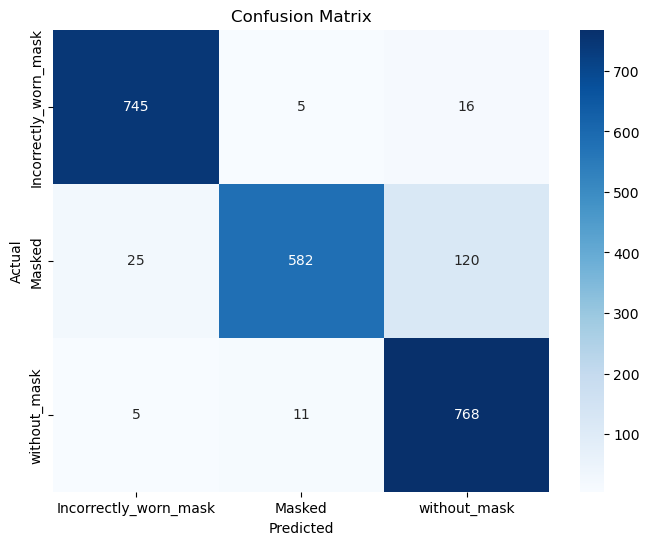

In [54]:
# Confusion Matrix
confusion = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### EVALUATION METRICS FOR CNN WITH DATA AUGMENTATION

In [55]:
training_accuracy = history_with_Dataugmentation.history['accuracy']  
validation_accuracy = history_with_Dataugmentation.history['val_accuracy']  

# Print the last epoch's accuracies 
print(f'Training Accuracy: {training_accuracy[-1]:.4f}')
print(f'Validation Accuracy: {validation_accuracy[-1]:.4f}')

Training Accuracy: 0.9014
Validation Accuracy: 0.9248


In [56]:
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))
precision = precision_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')


In [57]:
# Display the evaluation metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.9201
Precision: 0.9266
Recall: 0.9201
F1 Score: 0.9191


In [58]:
from sklearn.metrics import classification_report

# Calculate classification report
classification_rep = classification_report(
    np.argmax(test_labels, axis=1),
    np.argmax(y_pred, axis=1),
    target_names=class_names,
    digits=4  # You can adjust the number of decimal places
)

# Display the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
                       precision    recall  f1-score   support

Incorrectly_worn_mask     0.9613    0.9726    0.9669       766
               Masked     0.9732    0.8006    0.8785       727
         without_mask     0.8496    0.9796    0.9100       784

             accuracy                         0.9201      2277
            macro avg     0.9280    0.9176    0.9184      2277
         weighted avg     0.9266    0.9201    0.9191      2277



# Implementation of **Transfer Learning**
We will be loading a pre-built architecture- which was trained on the ImageNet dataset. The transfer learning model built is DenseNet-201

### BUILDING OUR DENSNET201 MODEL

In [59]:
num_classes = 3
img_width, img_height = 64, 64
batch_size = 64
from tensorflow.keras.applications import DenseNet201

# Load pre-trained DenseNet-201 model
densenet201_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze all layers in the pre-trained DenseNet-201 model
for layer in densenet201_model.layers:
    layer.trainable = False

# Add custom layers for fine-tuning
x = densenet201_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)

# Output layer with softmax activation for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Create the fine-tuned model
densenet201_model_finetuned = Model(inputs=densenet201_model.input, outputs=predictions)

In [60]:
# Compile the model
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
densenet201_model_finetuned.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [61]:
# Record the start time
start_time = time.time()

# Fit the model
history = densenet201_model_finetuned.fit(train_images, train_labels, epochs=20, batch_size=batch_size, validation_data=(val_images, val_labels), callbacks=[early_stopping], verbose=1)


# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/20
114/114 [==============================] - 240s 2s/step - loss: 0.2123 - accuracy: 0.9204 - val_loss: 0.1542 - val_accuracy: 0.9396
Epoch 2/20
114/114 [==============================] - 220s 2s/step - loss: 0.0672 - accuracy: 0.9760 - val_loss: 0.1202 - val_accuracy: 0.9583
Epoch 3/20
114/114 [==============================] - 215s 2s/step - loss: 0.0394 - accuracy: 0.9863 - val_loss: 0.1233 - val_accuracy: 0.9550
Epoch 4/20
114/114 [==============================] - 213s 2s/step - loss: 0.0352 - accuracy: 0.9872 - val_loss: 0.1383 - val_accuracy: 0.9539
Epoch 5/20
114/114 [==============================] - 211s 2s/step - loss: 0.0326 - accuracy: 0.9874 - val_loss: 0.1251 - val_accuracy: 0.9610
Epoch 6/20
114/114 [==============================] - 213s 2s/step - loss: 0.0215 - accuracy: 0.9923 - val_loss: 0.1226 - val_accuracy: 0.9610
Epoch 7/20
114/114 [==============================] - 212s 2s/step - loss: 0.0123 - accuracy: 0.9957 - val_loss: 0.1481 - val_accuracy: 0.9610

In [62]:
densenet201_model_finetuned.save("Densnet201FaceMask3model.h5") #saving of our densnet201 model

In [63]:
test_loss, test_acc = densenet201_model_finetuned.evaluate(test_images, test_labels, verbose=1)

72/72 [==============================] - 57s 779ms/step - loss: 0.1603 - accuracy: 0.9614


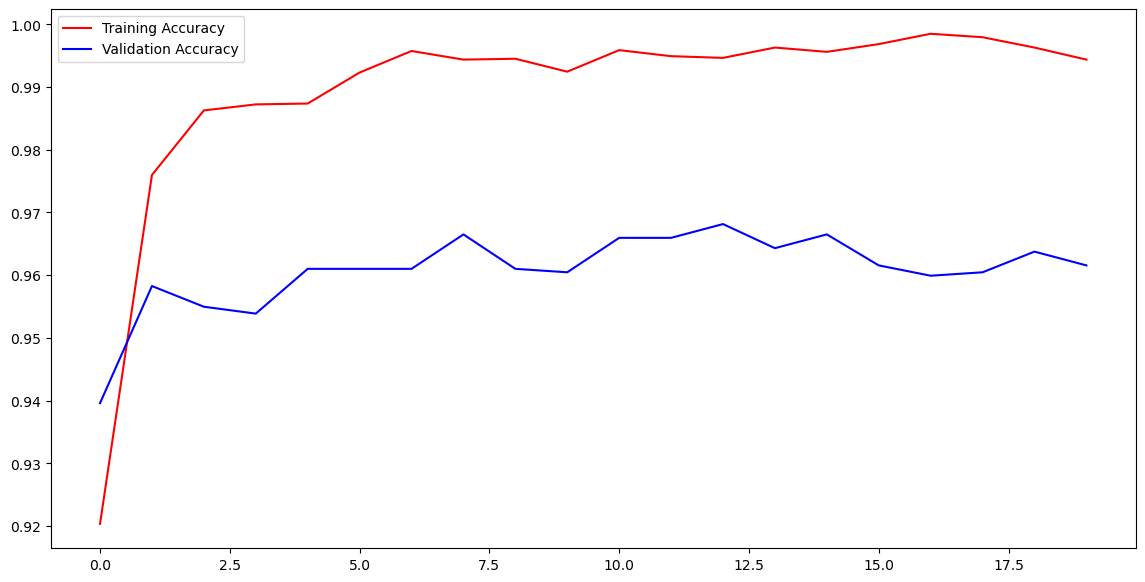

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

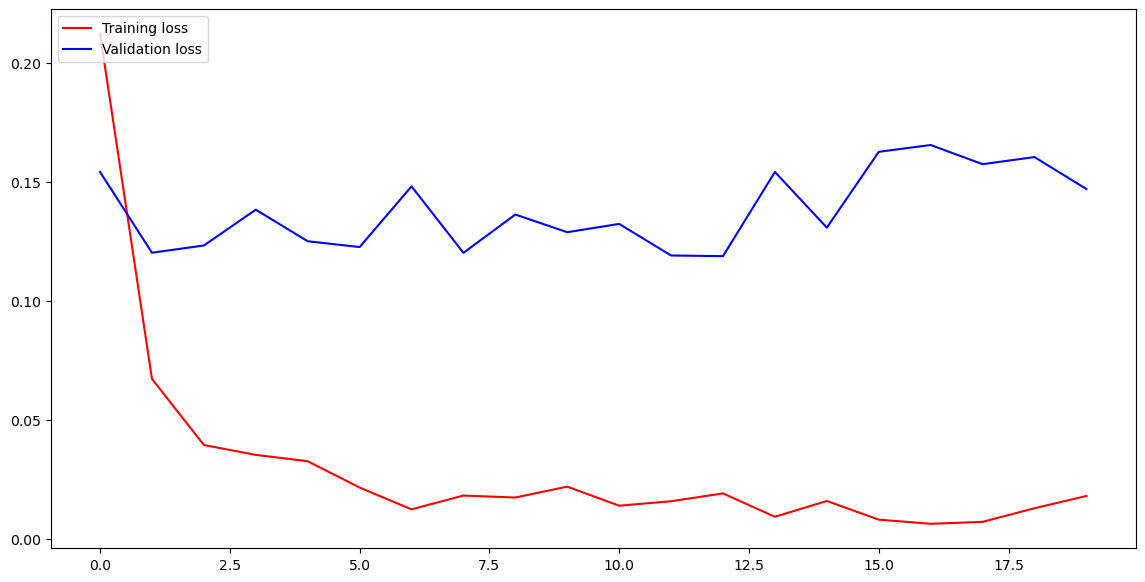

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [66]:
y_pred = densenet201_model_finetuned.predict(test_images)

72/72 [==============================] - 62s 796ms/step


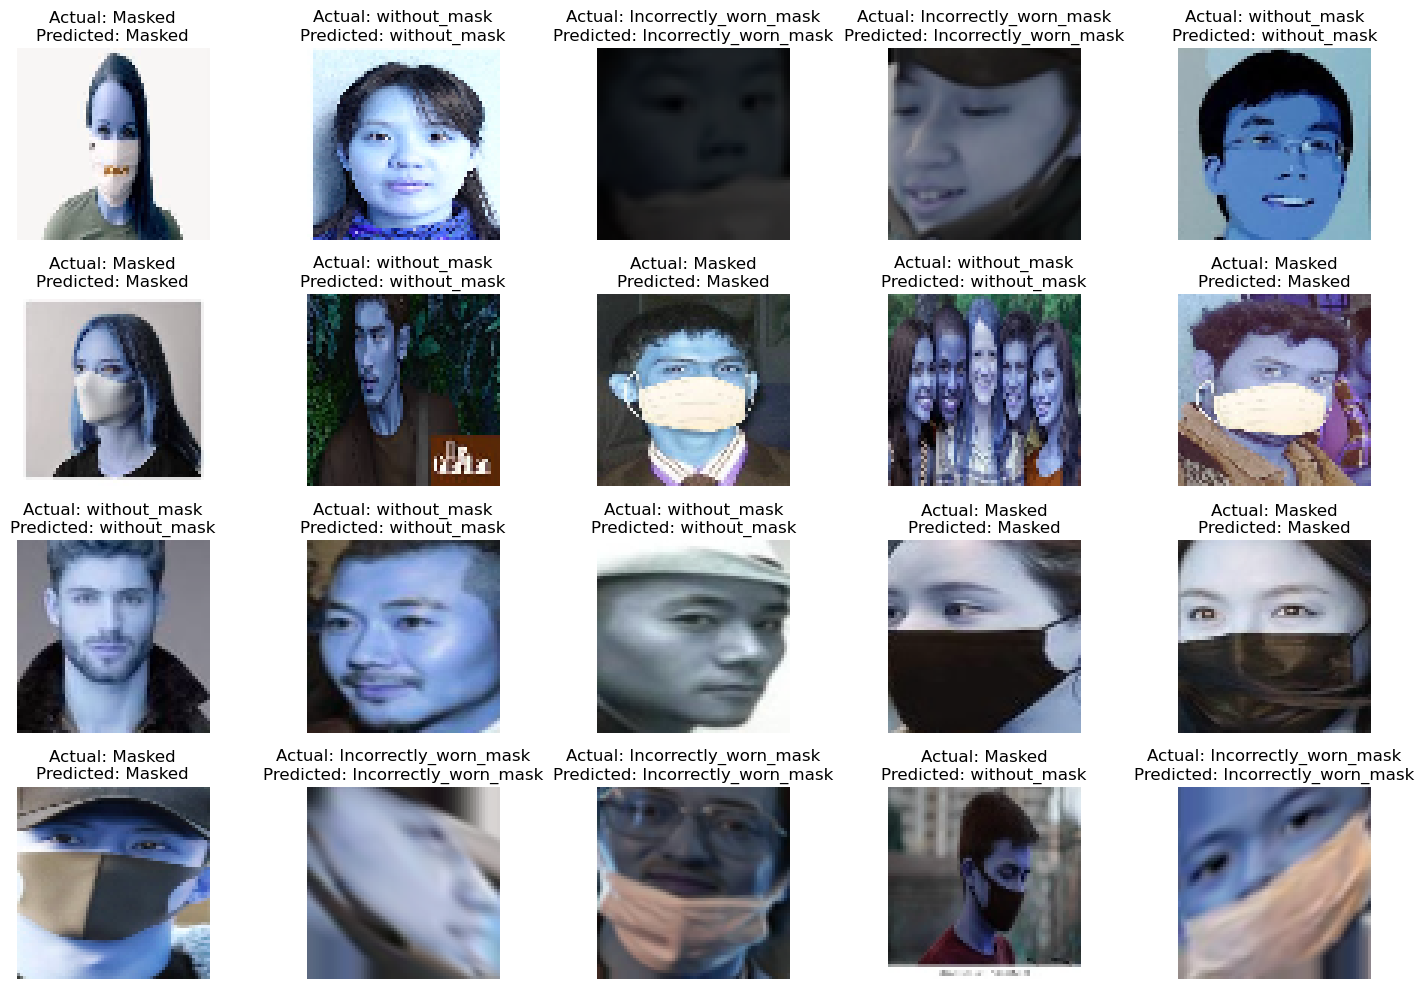

In [67]:
# Define class names
class_names = FaceMaskDF['target'].unique()

# Set the number of samples to display
samples_num = 20

# Generate random indices for displaying 20 images
random_idx = np.random.choice(len(test_images), samples_num, replace=False)

# Create a figure with four rows
fig, axes = plt.subplots(4, samples_num // 4, figsize=(15, 10))

# Flattening for easier indexing
axes = axes.ravel()

for i, idx in enumerate(random_idx):
    # Display the actual image
    axes[i].imshow(test_images[idx])

    # Get the actual and predicted class labels
    actual_class = class_names[np.argmax(test_labels[idx])]
    predicted_class = class_names[np.argmax(y_pred[idx])]

    # Format the title using triple quotes
    title = f"Actual: {actual_class}\nPredicted: {predicted_class}"

    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### CONFUSION MATRIX FOR DENSENET201

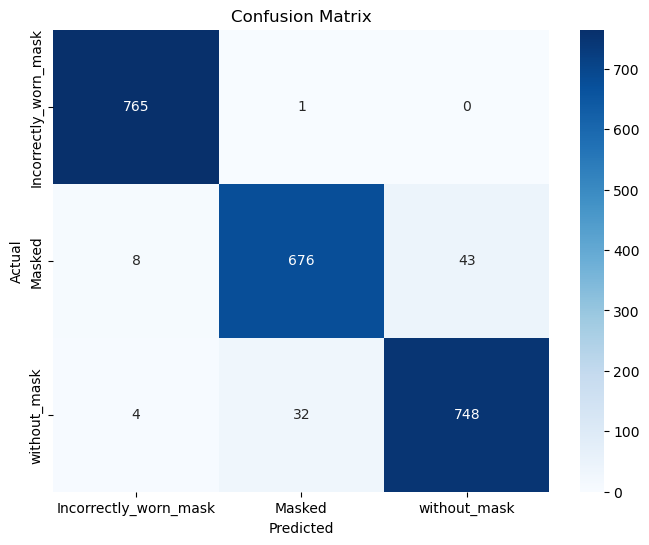

In [68]:
# Confusion Matrix
confusion = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [69]:
training_accuracy = history.history['accuracy']  
validation_accuracy = history.history['val_accuracy']  

# Print the last epoch's accuracies 
print(f'Training Accuracy: {training_accuracy[-1]:.4f}')
print(f'Validation Accuracy: {validation_accuracy[-1]:.4f}')

Training Accuracy: 0.9944
Validation Accuracy: 0.9616


In [70]:
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1))
precision = precision_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')



In [71]:
# Display the evaluation metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.9614
Precision: 0.9612
Recall: 0.9614
F1 Score: 0.9612


In [72]:
from sklearn.metrics import classification_report

# Calculate classification report
classification_rep = classification_report(
    np.argmax(test_labels, axis=1),
    np.argmax(y_pred, axis=1),
    target_names=class_names,
    digits=4  # You can adjust the number of decimal places
)

# Display the classification report
print("Classification Report:")
print(classification_rep)


Classification Report:
                       precision    recall  f1-score   support

Incorrectly_worn_mask     0.9846    0.9987    0.9916       766
               Masked     0.9535    0.9298    0.9415       727
         without_mask     0.9456    0.9541    0.9498       784

             accuracy                         0.9614      2277
            macro avg     0.9612    0.9609    0.9610      2277
         weighted avg     0.9612    0.9614    0.9612      2277



In [73]:
class_names = FaceMaskDF['target'].unique()
print("class_names :", class_names)

class_names : ['Incorrectly_worn_mask' 'Masked' 'without_mask']


In [74]:
encoder.fit(class_names)

LabelEncoder()

In [75]:
def classifier(image_path):
    redear = cv2.imread(image_path)
    resize = cv2.resize(redear, (64, 64))
    rescaling = resize / 255.0
    rescaling = rescaling.reshape((1, 64, 64, 3))  
    predictor = model.predict(rescaling, verbose=0)
    predicted_class = np.argmax(predictor, axis=1)
    predicted_label = encoder.classes_[predicted_class[0]]
    return predicted_label